## Problem Statement
This project aims to both try to determine what a song's genre is based on the different features that Spotify is able to provide as well as the popularity
- We will be creating two models

## Data Collection 
- Dataset source: https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs?resource=download
- I will also be using the spotify API to get the artist's popularity to help with the predictions as I predict that those factors will play a role in a song's popularity
- This dataset contains 21 columns and 114000 songs/rows as stated in the kaggle dataset

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing data and Simple EDA

In [2]:
data = pd.read_csv('spotify.csv')
data.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
data.shape

(114000, 21)

### Dataset Information

Unnamed: index from original dataset

track_id: The unique Spotify ID for each track.

artists: Names of the artists who performed the track, separated by ';'.

album_name: The name of the album in which the track appears.

track_name: The title of the track.

popularity: A value between 0 and 100, indicating the track's popularity based on recent plays.

duration_ms: The length of the track in milliseconds.

explicit: Boolean indicating whether the track contains explicit content.

danceability: Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).

energy: Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).

key: The musical key of the track mapped using standard Pitch Class notation.

loudness: Overall loudness of the track in decibels (dB).

mode: Indicates the modality (major or minor) of the track.

speechiness: Detects the presence of spoken words in the track.

acousticness: Confidence measure of whether the track is acoustic (0.0 = not acoustic, 1.0 = highly acoustic).

instrumentalness: Predicts whether a track contains vocals (0.0 = contains vocals, 1.0 = instrumental).

liveness: Detects the presence of an audience in the recording (0.0 = studio recording, 1.0 = live performance).

valence: Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive).

tempo: Estimated tempo of the track in beats per minute (BPM).

time_signature: Estimated time signature of the track (3 to 7).

track_genre: The genre of the song

In [4]:
data.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

1 missing value in artist, album_name and track_name however these probably will not play a role in predictions so those columns will be dropped

In [3]:
data = data.dropna()

In [6]:
data.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
# No duplicates
data.duplicated().sum()

0

In [8]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [9]:
data.nunique()

Unnamed: 0          113999
track_id             89740
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50696
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45652
time_signature           5
track_genre            114
dtype: int64

In [10]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [11]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
data['artist'] = data['artists'].apply(lambda x: x.split(';')[0])

In [13]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artist
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Gen Hoshino
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Ben Woodward
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Ingrid Michaelson
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Kina Grannis
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Chord Overstreet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Rainy Lullaby
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Rainy Lullaby
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Cesária Evora
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Michael W. Smith


## Data Visualization

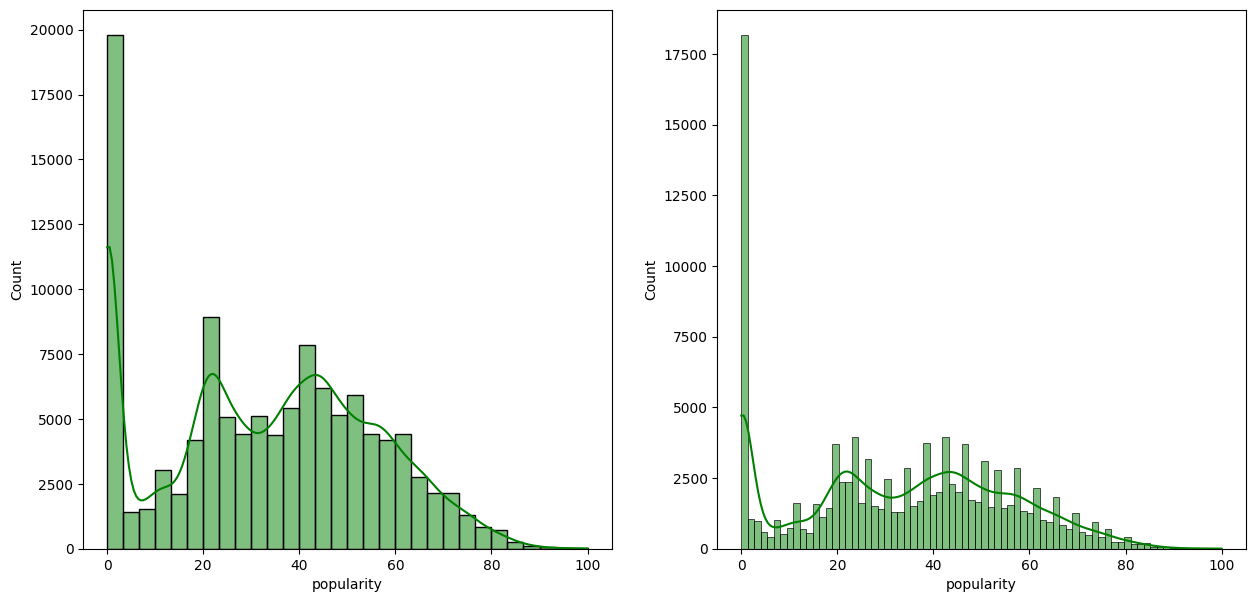

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='popularity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='popularity',kde=True,color='g')
plt.show()

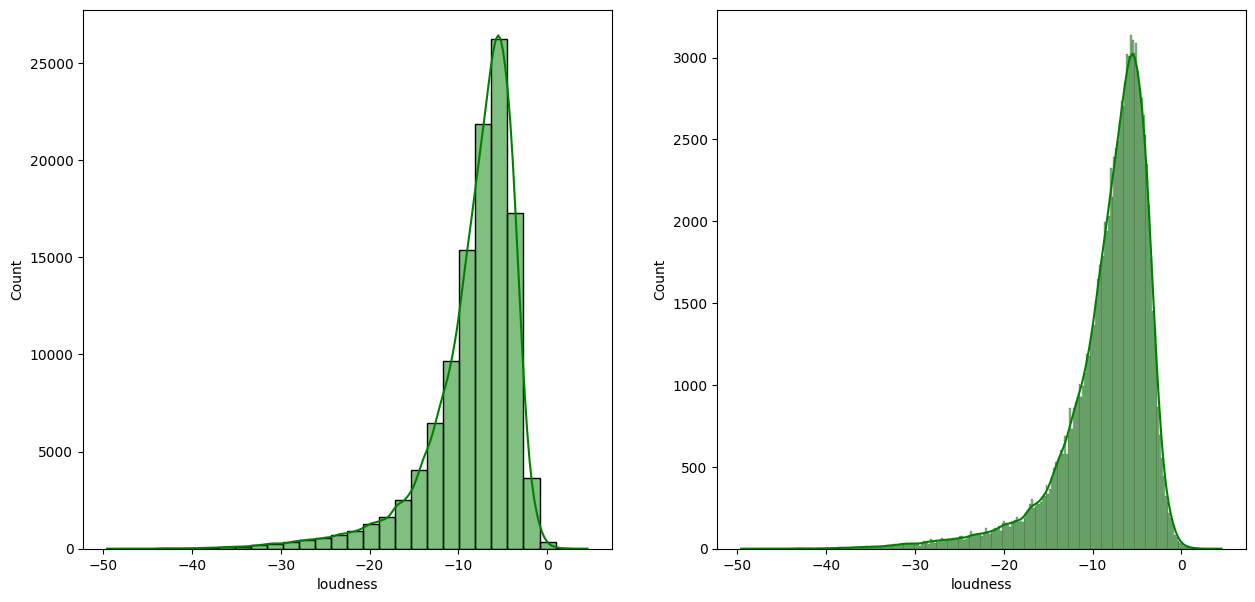

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='loudness',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='loudness',kde=True,color='g')
plt.show()

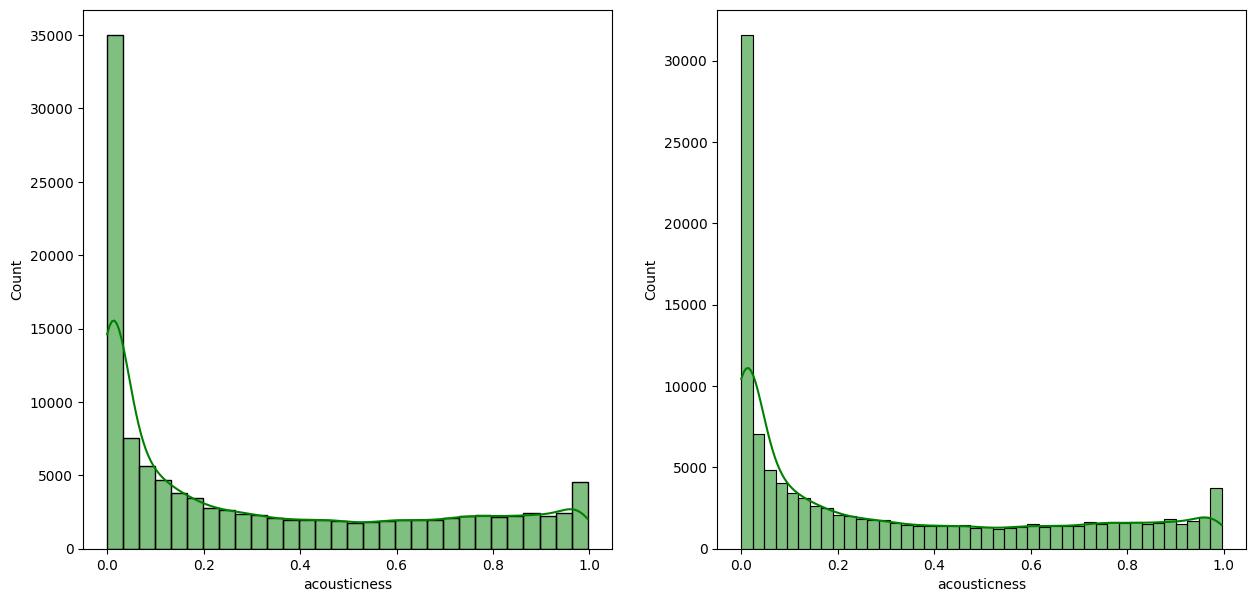

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='acousticness',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='acousticness',kde=True,color='g')
plt.show()

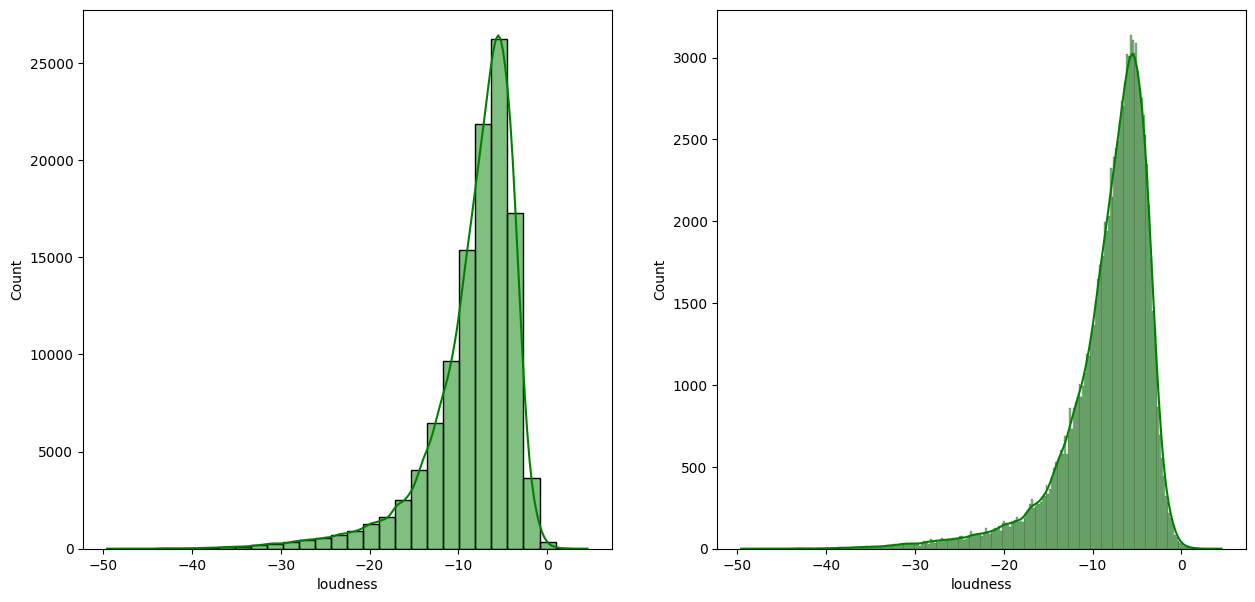

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='loudness',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='loudness',kde=True,color='g')
plt.show()

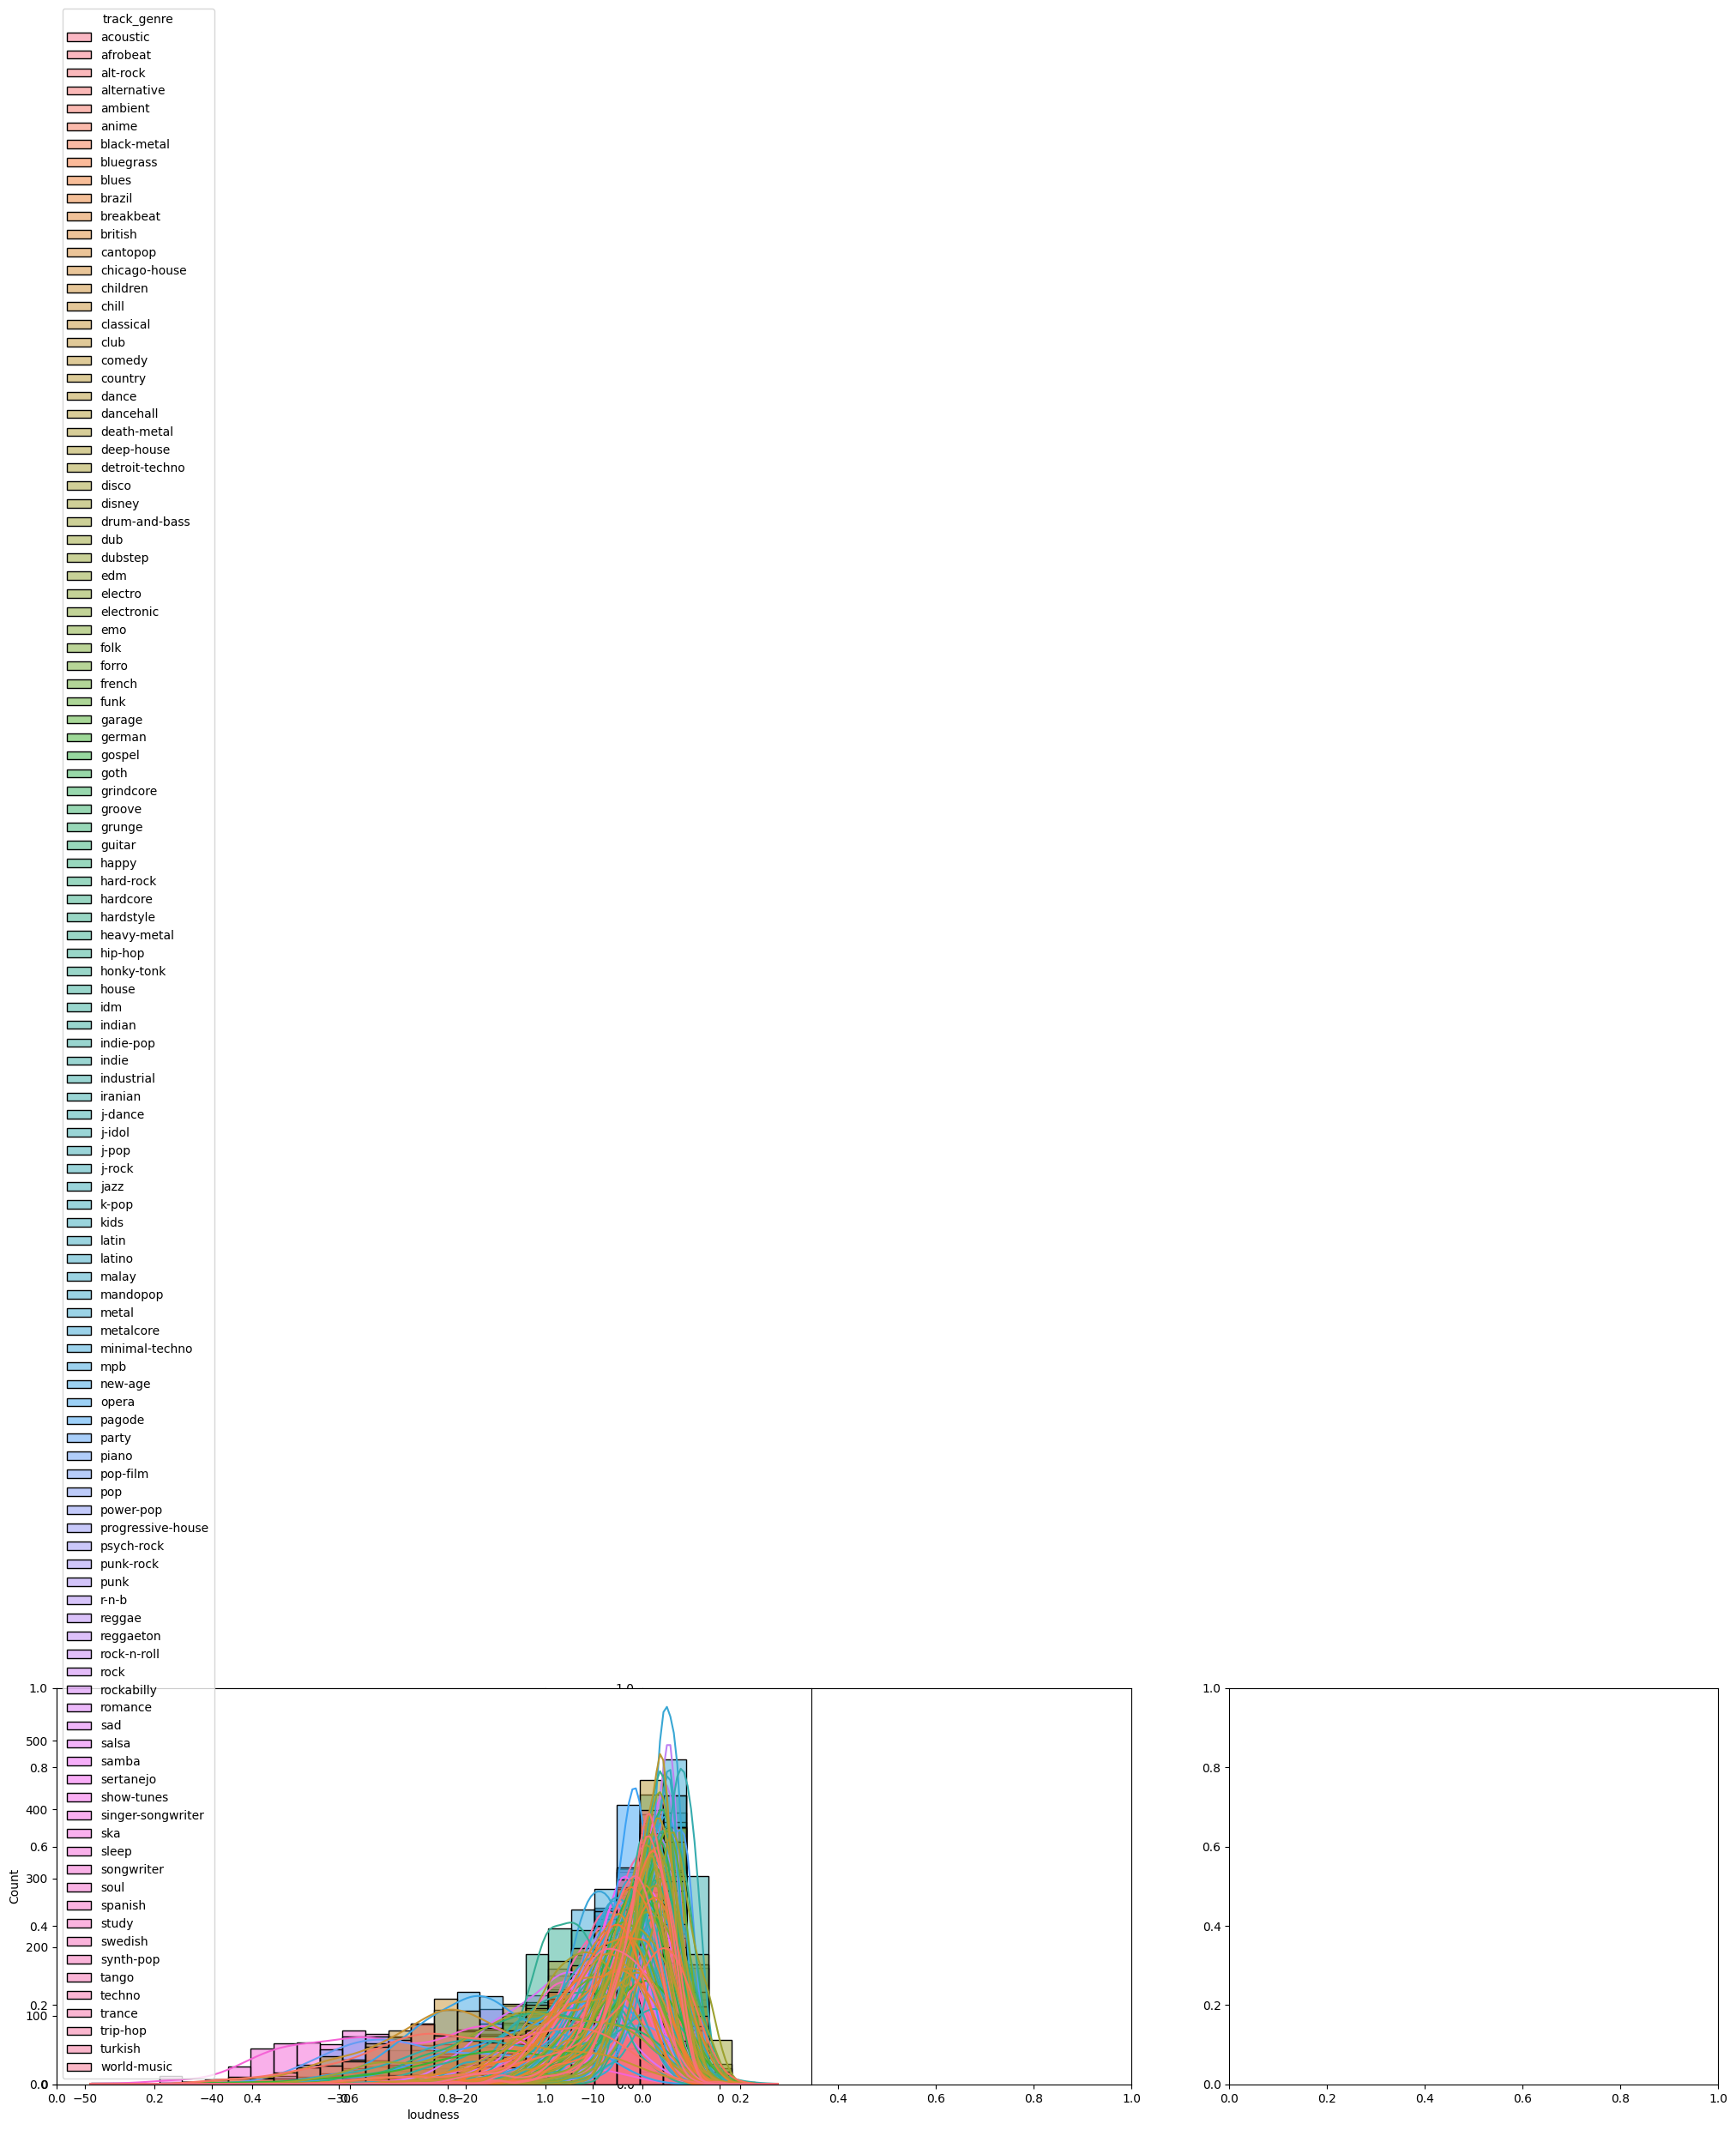

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(121)
ax =sns.histplot(data=data,x='loudness',bins=30,kde=True,hue='track_genre')

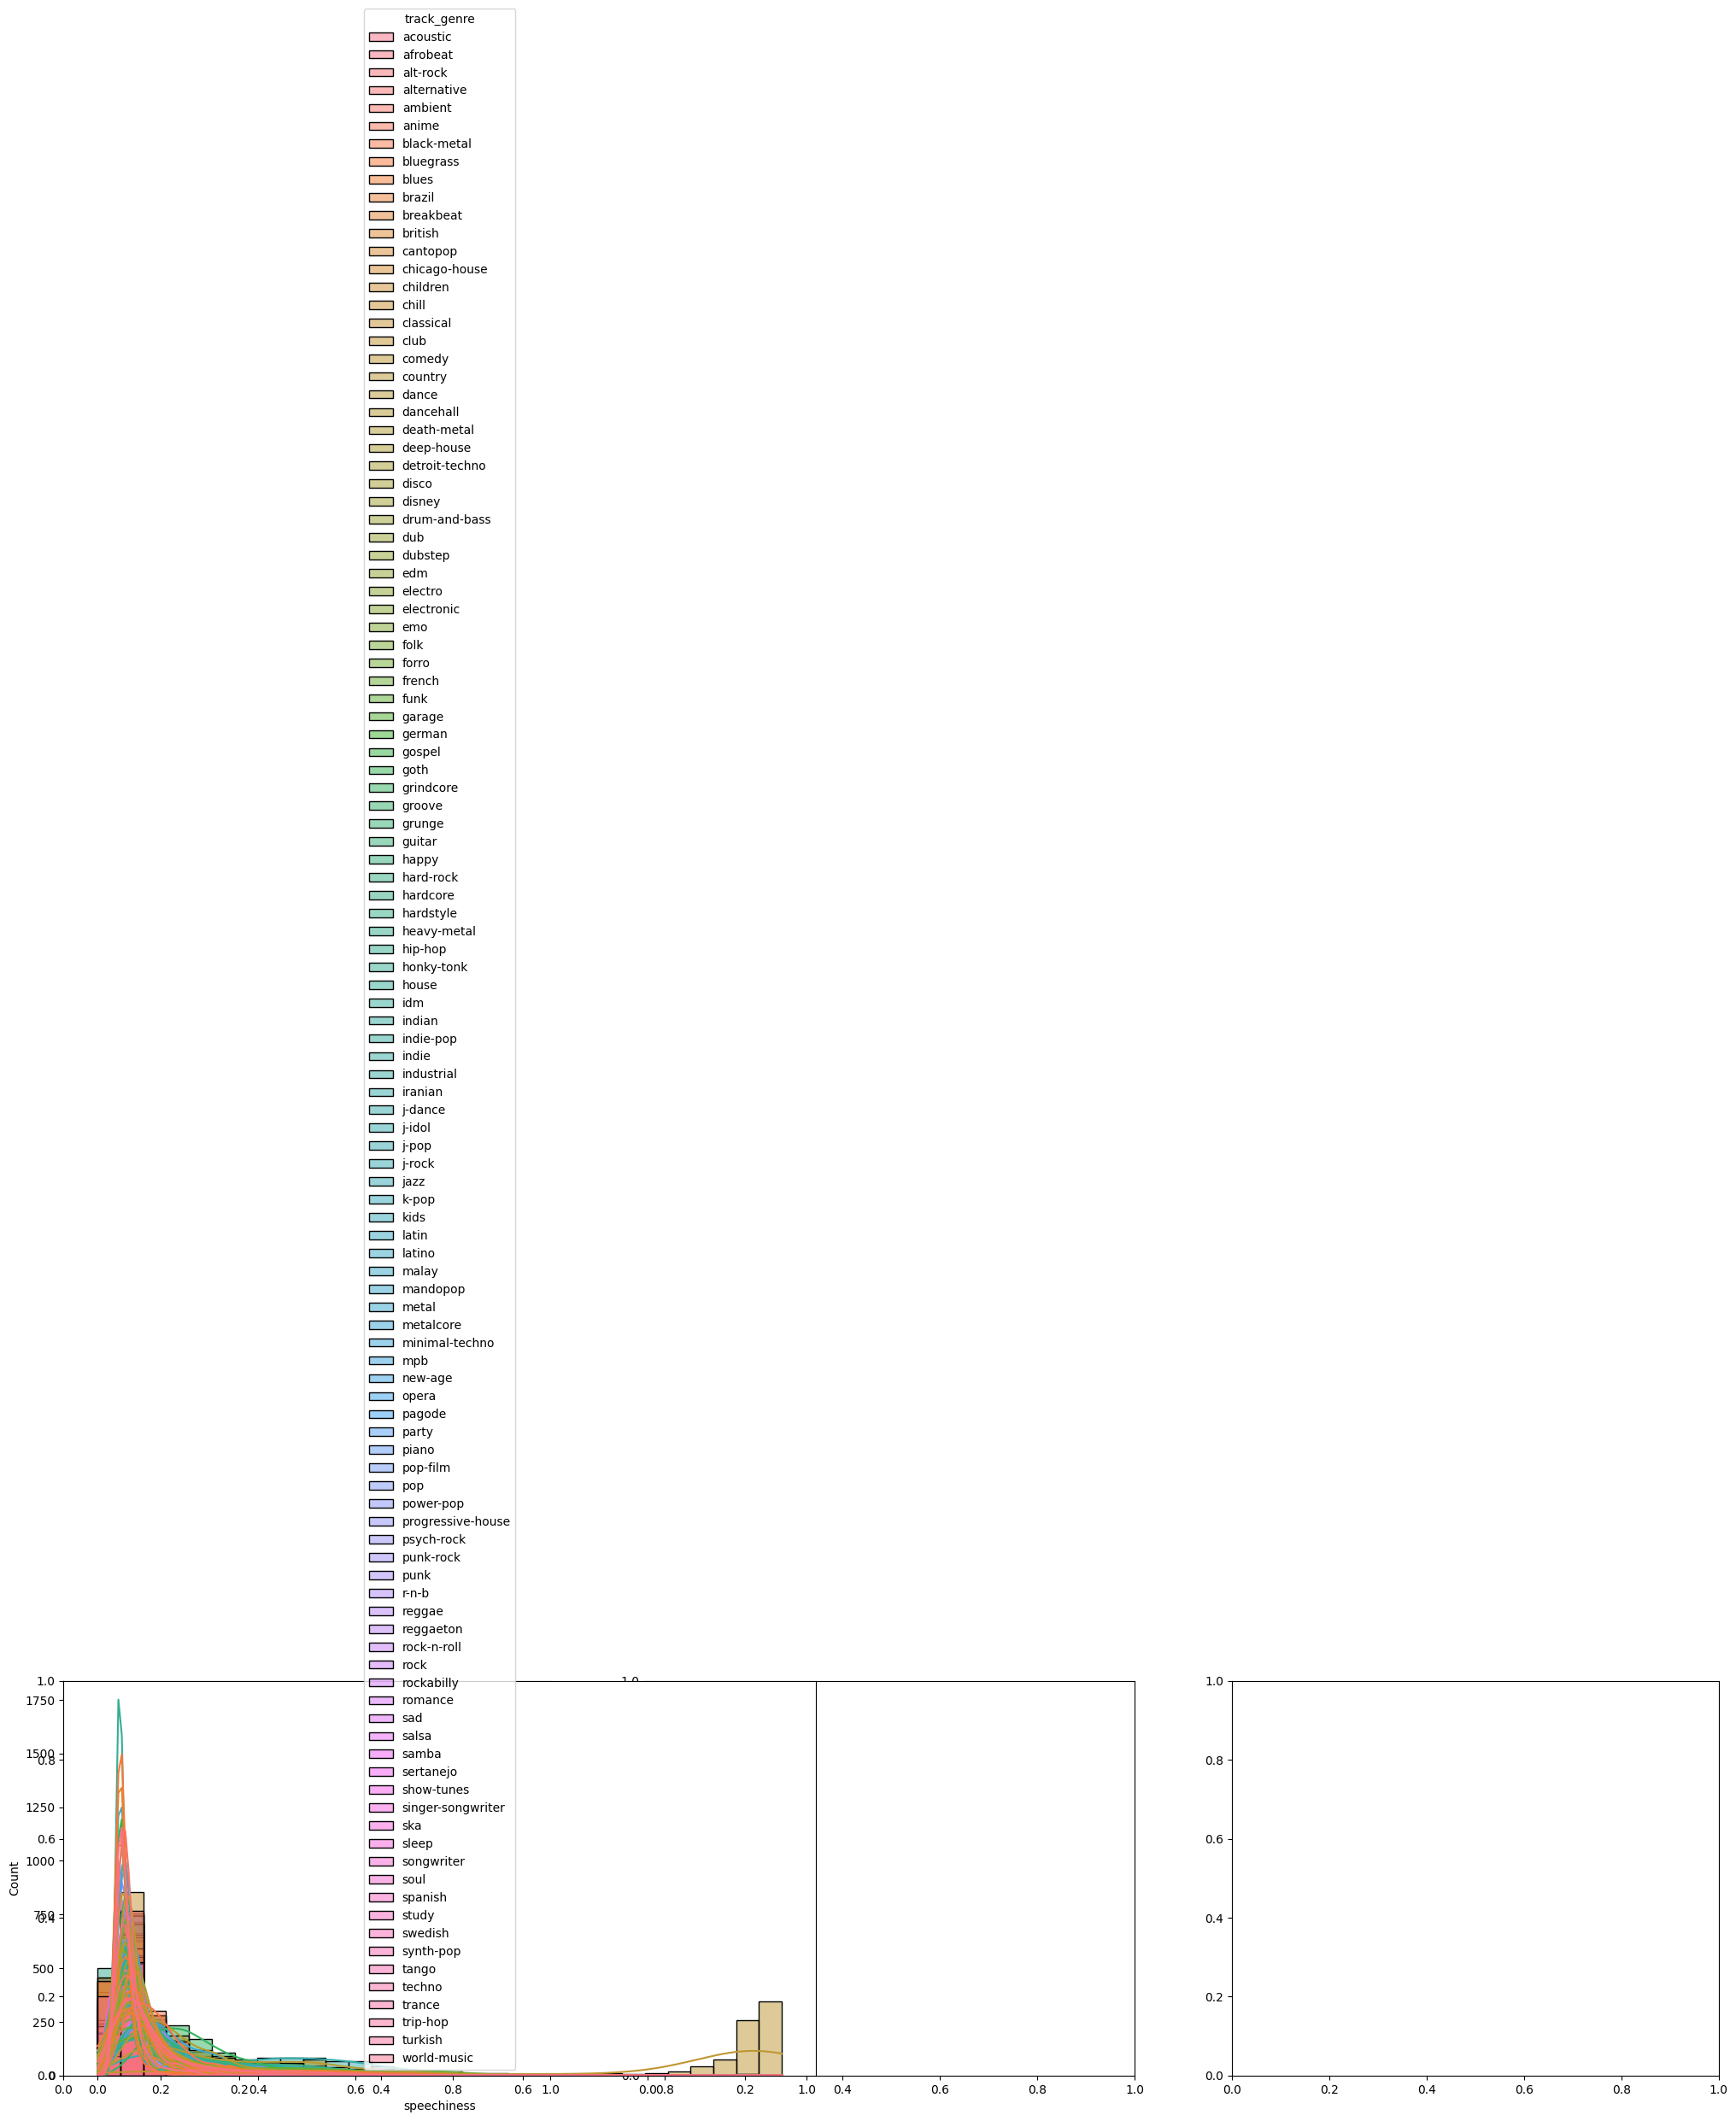

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(121)
ax =sns.histplot(data=data,x='speechiness',bins=30,kde=True,hue='track_genre')

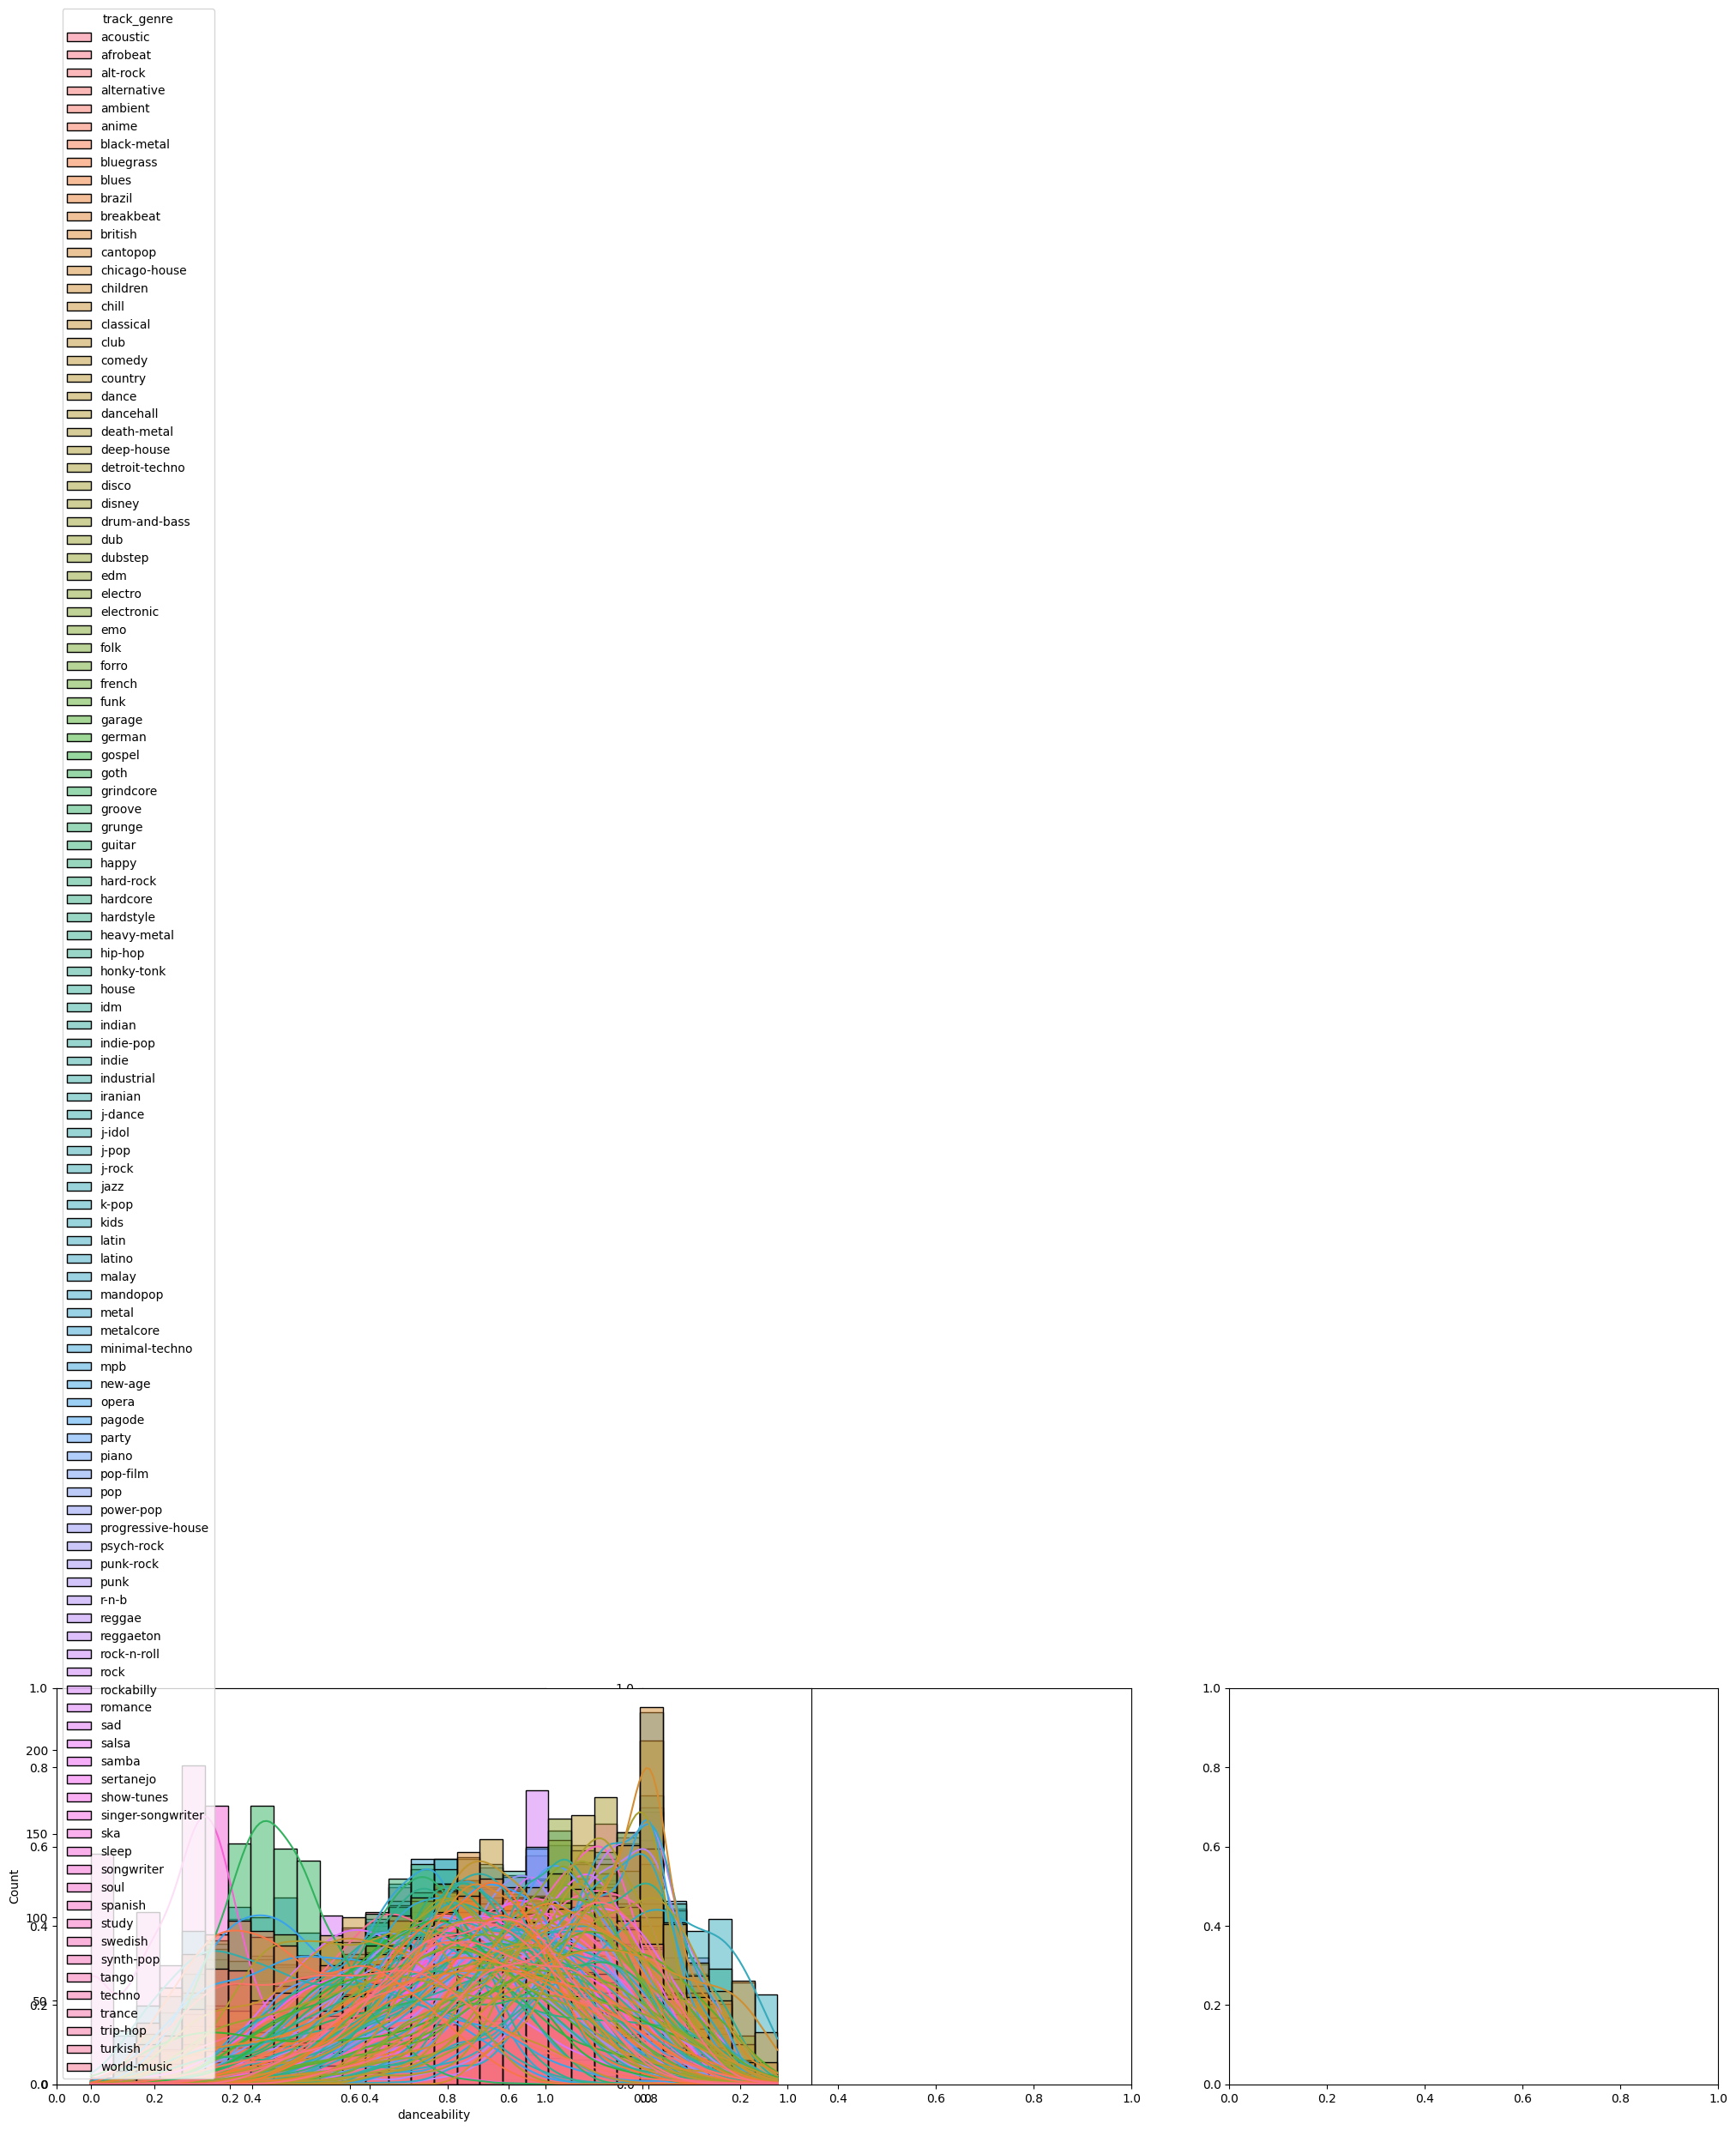

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(121)
ax =sns.histplot(data=data,x='danceability',bins=30,kde=True,hue='track_genre')

We can see from the distributions that we can not really determine up front if we can determine genre by these metric

## Data Preprocessing

In [5]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 16 numerical features : ['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

We have 6 categorical features : ['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'artist']


## Creating new columns
I want to create new columns for popularity

In [6]:
!pip install scikit-learn

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['track_genre_encoded'] = label_encoder.fit_transform(data['track_genre'])
data.head()
data[data['track_genre_encoded'] == 113] # check if next line of code will map correct number to genre

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artist,track_genre_encoded
113000,113000,5XCtjnFMKtCT7ycDwV3Kdh,Hillsong Worship;Brooke Ligertwood,What A Beautiful Name,What A Beautiful Name,66,240200,False,0.417,0.499,...,0.0296,0.2120,0.000000,0.1120,0.1440,135.923,4,world-music,Hillsong Worship,113
113001,113001,0fxpHpK3aw2nFWII6yveDD,Matt Redman,"10,000 Reasons (Live)","10,000 Reasons (Bless The Lord) - Live",66,342493,False,0.431,0.485,...,0.0274,0.4520,0.000000,0.5440,0.3670,145.220,4,world-music,Matt Redman,113
113002,113002,0rH0mprtecH3grD9HFM5AD,Cory Asbury,Reckless Love,Reckless Love,70,333386,False,0.572,0.685,...,0.0356,0.0291,0.000000,0.0963,0.2320,110.698,4,world-music,Cory Asbury,113
113003,113003,1O6OPFAXdTdjHtT7Z2Hlt8,Bethel Music;Jenn Johnson,Peace,Goodness of God,61,456480,False,0.370,0.119,...,0.0392,0.9530,0.000002,0.0990,0.1830,110.424,4,world-music,Bethel Music,113
113004,113004,0H4BGX7L8UfoD0g4wgXd0D,Leeland,Way Maker,Way Maker - Single Version,64,206440,False,0.468,0.655,...,0.0296,0.0149,0.000000,0.1040,0.2220,144.045,4,world-music,Leeland,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Rainy Lullaby,113
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Rainy Lullaby,113
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Cesária Evora,113
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Michael W. Smith,113


In [7]:
data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [8]:
data['track_genre_encoded'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  57,  56,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  81,  80,  82,  83,  84,  86,  85,  87,  88,  89,  91,
        90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113])

In [9]:
genre_dict = dict(zip((data['track_genre_encoded'].unique()), data['track_genre'].unique()))
genre_dict

{0: 'acoustic',
 1: 'afrobeat',
 2: 'alt-rock',
 3: 'alternative',
 4: 'ambient',
 5: 'anime',
 6: 'black-metal',
 7: 'bluegrass',
 8: 'blues',
 9: 'brazil',
 10: 'breakbeat',
 11: 'british',
 12: 'cantopop',
 13: 'chicago-house',
 14: 'children',
 15: 'chill',
 16: 'classical',
 17: 'club',
 18: 'comedy',
 19: 'country',
 20: 'dance',
 21: 'dancehall',
 22: 'death-metal',
 23: 'deep-house',
 24: 'detroit-techno',
 25: 'disco',
 26: 'disney',
 27: 'drum-and-bass',
 28: 'dub',
 29: 'dubstep',
 30: 'edm',
 31: 'electro',
 32: 'electronic',
 33: 'emo',
 34: 'folk',
 35: 'forro',
 36: 'french',
 37: 'funk',
 38: 'garage',
 39: 'german',
 40: 'gospel',
 41: 'goth',
 42: 'grindcore',
 43: 'groove',
 44: 'grunge',
 45: 'guitar',
 46: 'happy',
 47: 'hard-rock',
 48: 'hardcore',
 49: 'hardstyle',
 50: 'heavy-metal',
 51: 'hip-hop',
 52: 'honky-tonk',
 53: 'house',
 54: 'idm',
 55: 'indian',
 57: 'indie-pop',
 56: 'indie',
 58: 'industrial',
 59: 'iranian',
 60: 'j-dance',
 61: 'j-idol',
 62: 'j

In [10]:
import pickle
import dill
import os
def save_object(file_path, obj):
    dir_path = os.path.dirname(file_path)

    os.makedirs(dir_path, exist_ok=True)

    with open(file_path, "wb") as file_obj:
        dill.dump(obj, file_obj)



In [12]:
save_object('/Users/colemak/Documents/spotifymodel/artifact/genre_dict.pkl', obj = genre_dict)

In [9]:
!pip install statsmodels

  Using cached statsmodels-0.14.2-cp312-cp312-macosx_10_9_x86_64.whl.metadata (9.2 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp312-cp312-macosx_10_9_x86_64.whl (10.4 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
X = data[['energy', 'loudness', 'acousticness']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

        feature       VIF
0        energy  1.793369
1      loudness  4.179832
2  acousticness  3.008467


Not a lot of correlation between

In [55]:
print(data['explicit'].value_counts())

explicit
False    104252
True       9747
Name: count, dtype: int64


In [56]:
print(data['time_signature'].value_counts())

time_signature
4    101842
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64


In [34]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


significant imbalances in the different classes so we need to resample

In [71]:
from sklearn.utils import resample

df_majority = data[data['explicit'] == False]
df_minority = data[data['explicit'] == True]

df_minority_upsampled = resample(df_minority, 
                                replace=True,
                                n_samples=len(df_majority),
                                random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [72]:
data_resampled_time_signature = df_balanced.groupby('time_signature').apply(
    lambda x: x.sample(df_balanced['time_signature'].value_counts().max(), replace=True)
).reset_index(drop=True)

In [73]:
# Check the new distributions
print("Balanced Distribution of 'explicit':")
print(data_resampled_time_signature['explicit'].value_counts())

print("Balanced Distribution of 'time_signature':")
print(data_resampled_time_signature['time_signature'].value_counts())

Balanced Distribution of 'explicit':
explicit
False    539290
True     395335
Name: count, dtype: int64
Balanced Distribution of 'time_signature':
time_signature
0    186925
1    186925
3    186925
4    186925
5    186925
Name: count, dtype: int64


In [74]:
data_resampled_time_signature.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded
0,101513,3jpY2gUd3DOnDr4WPuMRHx,Deep Sleep;Relaxation And Meditation;Relax;Ont...,White Noise Collection,Pure Brown Noise - Loopable with No Fade,36,71397,False,0.0,0.000020,...,0,0.0,0.000,0.1240,0.688,0.0,0.0,0,sleep,101
1,101744,2WhCcPMlgs7ZpjtWZ1d17G,White Noise Babies;Binaural Beats Sleep;Binaur...,Theta Waves for Babies Baby Sleep,Box Fan Noise,34,60000,False,0.0,0.000103,...,1,0.0,0.957,0.0204,0.676,0.0,0.0,0,sleep,101
2,101342,0pVOHvFXPjfx94Io7n4SB9,Granular,Brown Noise For Sleep,Brown Noise For Sleep 2,42,81828,False,0.0,0.001880,...,0,0.0,0.933,0.5210,0.110,0.0,0.0,0,sleep,101
3,93111,1JihKsZjTyaqh0sPpOJqxW,Maya Kristalinskaya,Поёт Майя Кристалинская (Remastered),Три товарища - Remastered,26,122206,False,0.0,0.122000,...,0,0.0,0.987,0.3240,0.824,0.0,0.0,0,romance,93
4,101984,18uUw1Stb2demvWXH7ZwMN,Vacuum Cleaner White Noise;Baby Sweet Dream,Soothing Sleeping Sounds,Clean White Noise - Loopable With No Fade - Ba...,31,86373,False,0.0,0.002240,...,1,0.0,0.971,0.7170,0.105,0.0,0.0,0,sleep,101


In [19]:
data_resampled_time_signature.shape

(934625, 23)

We need to drop certain columns that will not be useful in model training: track_id, album_name, track_name, and track_genre

dropping genre will only for for popularity prediction, it will be kept for genre prediction

In [78]:
data_resampled_no_genre = data_resampled_time_signature.drop(['track_id','album_name','track_name','track_genre', 'artists'],axis =1)
data_resampled_w_genre = data_resampled_time_signature.drop(['track_id','album_name','track_name'],axis =1)

In [79]:
data_resampled_no_genre.head()

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_encoded
0,101513,36,71397,False,0.0,0.000020,10,-17.502,0,0.0,0.000,0.1240,0.688,0.0,0.0,0,101
1,101744,34,60000,False,0.0,0.000103,2,-29.600,1,0.0,0.957,0.0204,0.676,0.0,0.0,0,101
2,101342,42,81828,False,0.0,0.001880,2,-24.580,0,0.0,0.933,0.5210,0.110,0.0,0.0,0,101
3,93111,26,122206,False,0.0,0.122000,7,-20.512,0,0.0,0.987,0.3240,0.824,0.0,0.0,0,93
4,101984,31,86373,False,0.0,0.002240,10,-40.606,1,0.0,0.971,0.7170,0.105,0.0,0.0,0,101


### Normalizing and scaling

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
                        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
data_resampled_no_genre[continuous_features] = scaler.fit_transform(data_resampled_no_genre[continuous_features])
data_resampled_no_genre

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,101580,0.146119,-0.565321,False,-1.603009,-1.567143,1.303303,-0.688662,1.457191,1.186396,...,False,False,False,False,False,True,False,False,False,False
1,101265,0.554650,-0.634910,False,-1.603009,-1.567144,-0.656029,-0.688662,-1.182431,-0.313282,...,False,False,False,True,False,False,False,False,False,False
2,113688,-0.415613,16.765192,False,-1.603009,-1.567143,0.082464,-0.688662,-0.684490,1.983428,...,False,False,False,False,False,True,False,False,False,False
3,101988,-0.007081,-0.089524,False,-1.603009,-1.567143,-0.502783,-0.688662,-1.172124,1.729112,...,False,False,False,False,False,True,False,False,False,False
4,101667,0.095052,-0.526211,False,-1.603009,-1.567143,0.297941,-0.688662,-0.684490,-0.635634,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934620,20508,-1.590141,-0.011240,False,0.229753,0.212991,0.534044,-0.356903,-0.812991,-0.637770,...,False,False,True,False,False,False,False,False,False,True
934621,27734,-0.875211,0.581408,False,-0.281017,1.442323,1.135140,-0.432386,-1.181502,0.200594,...,False,True,False,False,False,False,False,False,False,True
934622,18799,-0.517745,0.025302,False,0.244775,1.068855,0.615736,1.384376,0.854843,-0.638387,...,False,False,False,False,False,False,False,False,False,True
934623,94940,0.605717,-0.225534,True,0.552740,-0.297415,0.327658,-0.370895,0.016910,-0.483700,...,False,False,False,False,False,True,False,False,False,True


In [63]:
data_resampled_no_genre = pd.get_dummies(data_resampled_no_genre, columns=['key', 'mode', 'time_signature'], drop_first=True)
data_resampled_no_genre

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,101580,0.146119,-0.565321,False,-1.603009,-1.567143,1.303303,-0.688662,1.457191,1.186396,...,False,False,False,False,False,True,False,False,False,False
1,101265,0.554650,-0.634910,False,-1.603009,-1.567144,-0.656029,-0.688662,-1.182431,-0.313282,...,False,False,False,True,False,False,False,False,False,False
2,113688,-0.415613,16.765192,False,-1.603009,-1.567143,0.082464,-0.688662,-0.684490,1.983428,...,False,False,False,False,False,True,False,False,False,False
3,101988,-0.007081,-0.089524,False,-1.603009,-1.567143,-0.502783,-0.688662,-1.172124,1.729112,...,False,False,False,False,False,True,False,False,False,False
4,101667,0.095052,-0.526211,False,-1.603009,-1.567143,0.297941,-0.688662,-0.684490,-0.635634,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934620,20508,-1.590141,-0.011240,False,0.229753,0.212991,0.534044,-0.356903,-0.812991,-0.637770,...,False,False,True,False,False,False,False,False,False,True
934621,27734,-0.875211,0.581408,False,-0.281017,1.442323,1.135140,-0.432386,-1.181502,0.200594,...,False,True,False,False,False,False,False,False,False,True
934622,18799,-0.517745,0.025302,False,0.244775,1.068855,0.615736,1.384376,0.854843,-0.638387,...,False,False,False,False,False,False,False,False,False,True
934623,94940,0.605717,-0.225534,True,0.552740,-0.297415,0.327658,-0.370895,0.016910,-0.483700,...,False,False,False,False,False,True,False,False,False,True


## Train/Test Split

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = data_resampled_no_genre.drop('track_genre_encoded', axis=1)  #track_genre_encoded will be the y
y = data_resampled_no_genre['track_genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_train, y_train, test_size=.25, random_state=42)
X_train.head()

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
202096,6907,-0.772948,0.160674,True,-0.656962,1.498398,0.581028,-0.071796,-1.181155,0.070627,...,False,False,False,False,False,False,True,False,False,False
593514,18305,-0.416041,0.235880,True,1.032559,0.109717,0.685787,-0.422372,0.626310,-0.637634,...,True,False,False,False,False,True,False,False,True,False
502065,42781,-0.976895,-0.629380,True,-0.634435,1.451693,0.736356,0.035109,-1.180294,1.678640,...,False,False,False,False,False,True,False,True,False,False
916768,60042,-1.588736,-0.218641,True,1.036313,1.221284,1.213086,0.853488,-1.018623,-0.637634,...,True,False,False,False,False,True,False,False,False,True
740020,98611,-0.467028,0.007076,True,0.923678,0.340126,0.582312,-0.514163,-1.166702,-0.610353,...,True,False,False,False,False,True,False,False,True,False


In [99]:
model_rf = RandomForestClassifier(n_estimators=95, random_state=42, verbose=True)
model_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   37.0s


RandomForestClassifier(n_estimators=95, random_state=42, verbose=True)

In [100]:
y_pred_validation = model_rf.predict(X_validation_test)

print('Accuracy:', accuracy_score(y_validation_test, y_pred_validation))
print('Classification Report:')
print(classification_report(y_validation_test, y_pred_validation))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.5s


Accuracy: 0.99175070215327
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       1.00      1.00      1.00      1016
           2       0.98      0.99      0.99       792
           3       0.99      0.99      0.99      1015
           4       1.00      1.00      1.00      2740
           5       0.99      1.00      1.00       893
           6       1.00      1.00      1.00      1726
           7       1.00      1.00      1.00       539
           8       0.98      0.99      0.98       593
           9       0.99      0.99      0.99      1707
          10       0.99      0.99      0.99       385
          11       0.99      0.97      0.98       858
          12       0.95      0.99      0.97       447
          13       0.99      0.99      0.99       283
          14       0.99      0.99      0.99       735
          15       0.99      0.99      0.99      1131
          16       1.00      1.

In [101]:
y_pred = model_rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.0s


Accuracy: 0.9922107797244885
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       873
           1       1.00      1.00      1.00       994
           2       0.98      0.99      0.99       850
           3       0.98      0.98      0.98       913
           4       1.00      1.00      1.00      2763
           5       0.99      1.00      0.99       897
           6       1.00      1.00      1.00      1725
           7       0.99      0.99      0.99       570
           8       0.99      0.96      0.98       635
           9       0.99      1.00      0.99      1713
          10       0.99      0.99      0.99       398
          11       0.98      0.98      0.98       943
          12       0.98      0.99      0.98       450
          13       1.00      0.99      0.99       222
          14       0.99      0.99      0.99       714
          15       0.99      0.99      0.99      1152
          16       1.00      

Accuracy scores are extemely similar so we can determine that our model is good but we will try fitting others

In [102]:
import xgboost as XGBClassifier

# Initialize and train model
model_xg = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_xg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_validation_xg = model_xg.predict(X_validation_test)
print("XGBoost Accuracy:", accuracy_score(y_validation_test, y_pred_validation_xg))
print('Classification Report:')
print(classification_report(y_validation_test, y_pred_validation_xg))

XGBoost Accuracy: 0.831349471713254
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       960
           1       0.69      0.84      0.76      1016
           2       0.61      0.83      0.71       792
           3       0.62      0.90      0.73      1015
           4       0.93      0.92      0.92      2740
           5       0.84      0.90      0.87       893
           6       0.90      0.89      0.89      1726
           7       0.79      0.91      0.84       539
           8       0.76      0.92      0.83       593
           9       0.88      0.87      0.88      1707
          10       0.80      0.95      0.87       385
          11       0.93      0.98      0.95       858
          12       0.49      0.86      0.62       447
          13       0.81      0.94      0.87       283
          14       0.84      0.95      0.89       735
          15       0.97      0.97      0.97      1131
          16       0.9

In [103]:
y_pred = model_xg.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8335428647853417
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       873
           1       0.71      0.85      0.78       994
           2       0.64      0.86      0.74       850
           3       0.58      0.89      0.70       913
           4       0.94      0.93      0.93      2763
           5       0.87      0.91      0.89       897
           6       0.91      0.88      0.90      1725
           7       0.82      0.92      0.87       570
           8       0.78      0.93      0.85       635
           9       0.88      0.88      0.88      1713
          10       0.78      0.94      0.86       398
          11       0.93      0.97      0.95       943
          12       0.49      0.88      0.63       450
          13       0.76      0.95      0.85       222
          14       0.81      0.94      0.87       714
          15       0.97      0.98      0.97      1152
          16       0.95      

In [104]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_validation_nb = model_nb.predict(X_validation_test)
print("Naive Bayes Accuracy:", accuracy_score(y_validation_test, y_pred_validation_nb))
print('Classification Report:')
print(classification_report(y_validation_test, y_pred_validation_nb))

Naive Bayes Accuracy: 0.9846836966697874
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       960
           1       0.99      0.98      0.98      1016
           2       0.97      1.00      0.99       792
           3       0.99      0.98      0.99      1015
           4       0.98      1.00      0.99      2740
           5       1.00      0.96      0.98       893
           6       1.00      1.00      1.00      1726
           7       1.00      1.00      1.00       539
           8       0.99      0.99      0.99       593
           9       0.99      1.00      0.99      1707
          10       0.98      0.95      0.96       385
          11       1.00      0.94      0.97       858
          12       0.90      1.00      0.95       447
          13       0.98      0.99      0.99       283
          14       0.99      0.99      0.99       735
          15       0.99      0.99      0.99      1131
          16     

In [105]:
y_pred = model_nb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9844376086665775
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       873
           1       0.98      0.98      0.98       994
           2       0.97      1.00      0.98       850
           3       0.99      0.99      0.99       913
           4       0.98      1.00      0.99      2763
           5       0.99      0.95      0.97       897
           6       1.00      1.00      1.00      1725
           7       1.00      1.00      1.00       570
           8       0.99      0.99      0.99       635
           9       0.98      1.00      0.99      1713
          10       0.97      0.92      0.94       398
          11       1.00      0.93      0.97       943
          12       0.90      1.00      0.95       450
          13       0.98      1.00      0.99       222
          14       1.00      0.99      1.00       714
          15       1.00      1.00      1.00      1152
          16       1.00      

# We achieved the best performance with the decisiontree so we will probably use this model

In [23]:
import dill    
def load_object(file_path):
    with open(file_path, "rb") as file_obj:
        return dill.load(file_obj)

In [25]:
model = load_object('/Users/colemak/Documents/spotifymodel/artifact/model.pkl')
model.feature_names

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names'